In [25]:
import sys
import os
from pathlib import Path

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# gdal
#pyproj 
%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath("src"))

from sat_image_reader import SatImageReader
from classes_reader import ClassesReader
from image_alignement_check import ImageAlignementCheck
from geo_keyfram_alignement import GeoKeyFrameAlign, GeoKeyFrameAlignGPUParallel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
PATH_DATA = "../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/"

In [27]:
os.listdir(PATH_DATA)

['planet.29N',
 'planet.52N',
 'planet.35S',
 'dynamicearthnet_test_labels',
 'planet.46N',
 'planet.44N',
 'LICENSE',
 'labels',
 'planet.32N',
 'planet.13N',
 'planet.60S',
 'planet.31N',
 'planet.43N',
 'planet.35N',
 'planet.34N',
 'planet.48N',
 'planet.38S',
 'planet.36N',
 'planet.56S',
 'planet.47N',
 'planet.38N',
 'planet.20S',
 'planet.54S',
 'planet.20N',
 'planet.34S',
 'planet.18N',
 'sentinel1',
 'planet.50S',
 'planet.16N',
 'planet.19S',
 'planet.50N',
 'planet.11N',
 'planet.22S',
 'checksums.sha512',
 'planet.17N',
 'planet.10N',
 'sentinel2',
 'planet.33S',
 'planet.39N',
 'planet.54N',
 'planet.21S',
 'planet.49N',
 'planet.30N',
 'planet.15N',
 'planet.33N']

In [28]:
os.listdir(PATH_DATA + "planet.10N/planet/10N/")

os.listdir(PATH_DATA + "planet.10N/planet/10N/19E-211N/")

['1286_2921_13']

In [29]:
labels = os.listdir(PATH_DATA + "labels/labels/")


len(labels)

55

In [30]:
test_labels = os.listdir(PATH_DATA + "dynamicearthnet_test_labels")


In [31]:
print(labels)

print(test_labels)

['4397_4302_13_33S', '2415_3082_13_18N', '2832_4366_13_21S', '4838_3506_13_36N', '6752_3115_13_50N', '4856_4087_13_36N', '5989_3554_13_44N', '7026_3201_13-52N', '2850_4139_13_21S', '4791_3920_13_36N', '4780_3377_13_36N', '6466_3380_13_48N', '3002_4273_13_22S', '6688_3456_13_49N', '4169_3944_13_31N', '6468_3360_13_48N', '6824_4117_13_50S', '6381_3681_13_47N', '1700_3100_13_13N', '4421_3800_13_33N', '2624_4314_13_20S', '5111_4560_13-38S', '4806_3588_13_36N', '7513_4968_13_56S', '6475_3361_13_48N', '1487_3335_13_11N', '6810_3478_13_50N', '2235_3403_13-17N', '2006_3280_13_15N', '2470_5030_13_19S', '4426_3835_13_33N', '2459_4406_13-19S', '8077_5007_13_60S', '3998_3016_13_30N', '7367_5050_13-54S', '4881_3344_13_36N', '6730_3430_13_50N', '1417_3281_13_11N', '5863_3800_13_43N', '1311_3077_13_10N', '5125_4049_13_38N', '4240_3972_13_32N', '2065_3647_13_16N', '4223_3246_13_31N', '4254_2915_13_32N', '7312_3008_13_54N', '6204_3495_13-46N', '2029_3764_13_15N', '2697_3715_13_20N', '4768_4131_13_35S',

In [32]:
print(len(test_labels))
for x in test_labels:
    if '1286' in x:
        print("ok")

22
ok


In [33]:
def list_subdirectories(directory, max_depth=5):
    """Affiche les noms des sous-dossiers après 'planet/' jusqu'à une profondeur maximale."""
    counter = 0
    list_subdirectories = []
    try:
        for root, dirs, files in os.walk(directory):
            depth = root[len(directory):].count(os.sep)
            if depth < max_depth:
                for dir_name in dirs:
                    relative_path = os.path.join(root, dir_name)
            if depth == max_depth-1:
                if "planet/" and "PF-SR" in relative_path:
                    print(relative_path.split("planet/")[-1])
                    counter += 1
                    list_subdirectories.append(relative_path)
    except Exception as e:
        print(f"Erreur : {e}")
    print(f"Nombre de dossiers : {counter}")
    return list_subdirectories
        
list_subdirectories = list_subdirectories(PATH_DATA)

print(list_subdirectories)

29N/8E-36N/3830_3914_13/PF-SR
52N/20E-168N/7026_3201_13/PF-SR
35S/32E-409N/4768_4131_13/PF-SR
46N/19E-117N/6204_3495_13/PF-SR
44N/30E-106N/5989_3554_13/PF-SR
44N/15E-32N/5912_3937_13/PF-SR
44N/18E-76N/5926_3715_13/PF-SR
32N/8E-25N/4240_3972_13/PF-SR
32N/14E-212N/4254_2915_13/PF-SR
13N/19E-184N/1700_3100_13/PF-SR
60S/13E-245N/8077_5007_13/PF-SR
31N/15E-201N/4127_2991_13/PF-SR
31N/21E-30N/4169_3944_13/PF-SR
31N/30E-161N/4223_3246_13/PF-SR
43N/11E-97N/5754_3601_13/PF-SR
43N/32E-59N/5863_3800_13/PF-SR
43N/26E-52N/5830_3834_13/PF-SR
35N/16E-278N/4666_2369_13/PF-SR
34N/17E-147N/4553_3325_13/PF-SR
34N/28E-175N/4622_3159_13/PF-SR
48N/17E-141N/6468_3360_13/PF-SR
48N/17E-138N/6466_3380_13/PF-SR
48N/19E-141N/6475_3361_13/PF-SR
38S/19E-324N/5111_4560_13/PF-SR
36N/22E-1N/4856_4087_13/PF-SR
36N/13E-100N/4806_3588_13/PF-SR
36N/9E-138N/4780_3377_13/PF-SR
36N/19E-115N/4838_3506_13/PF-SR
36N/26E-144N/4881_3344_13/PF-SR
36N/9E-35N/4791_3920_13/PF-SR
56S/10E-251N/7513_4968_13/PF-SR
56S/10E-261N/7517_4908_

In [34]:
import pandas as pd

In [35]:


df_labels_train = pd.DataFrame(labels, columns=["label"])
df_labels_train["key"] = df_labels_train["label"].apply(lambda x: "_".join(x.split("_")[:3]))
df_labels_train["train_test"]= "train"
df_labels_train["labels_path"] = PATH_DATA + "labels/labels/" + df_labels_train["label"]

df_labels_test = pd.DataFrame(test_labels, columns=["label"])
df_labels_test["key"] = df_labels_test["label"].apply(lambda x: "_".join(x.split("_")[:3]))
df_labels_test["train_test"]= "test"
df_labels_test["labels_path"] = PATH_DATA + "dynamicearthnet_test_labels/" + df_labels_test["label"]

df_labels = pd.concat([df_labels_train, df_labels_test])




In [36]:
df_labels


,label,key,train_test,labels_path
0,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...
1,2415_3082_13_18N,2415_3082_13,train,../../../../tsi/data_education/fil_rouge_Airbu...
2,2832_4366_13_21S,2832_4366_13,train,../../../../tsi/data_education/fil_rouge_Airbu...
3,4838_3506_13_36N,4838_3506_13,train,../../../../tsi/data_education/fil_rouge_Airbu...
4,6752_3115_13_50N,6752_3115_13,train,../../../../tsi/data_education/fil_rouge_Airbu...
...,...,...,...,...
17,4062_3943_13_30N,4062_3943_13,test,../../../../tsi/data_education/fil_rouge_Airbu...
18,2569_4513_13_19S,2569_4513_13,test,../../../../tsi/data_education/fil_rouge_Airbu...
19,2789_4694_13_21S,2789_4694_13,test,../../../../tsi/data_education/fil_rouge_Airbu...
20,7517_4908_13-56S,7517_4908_13-56S,test,../../../../tsi/data_education/fil_rouge_Airbu...


In [37]:
def get_raster_dir(label_path):
    label_path = label_path + "/"
    next_dir = ""
    while "Raster" not in os.listdir(label_path):
        next_dir = os.listdir(label_path)[0]
        label_path = label_path + next_dir + "/"
    return label_path + "Raster/"

df_labels["labels_path"]= df_labels["labels_path"].apply(get_raster_dir)

In [38]:
def get_right_dir(label_path):
    """"Renvoie le dossier qui ne contient pas le terme 'count_pixels'"""
    for dir_name in os.listdir(label_path):
        if "count_pixels" not in dir_name:
            return label_path + dir_name + "/"
    return None

df_labels["labels_path"]= df_labels["labels_path"].apply(get_right_dir)

In [39]:
df_labels["labels_path"]

0     ../../../../tsi/data_education/fil_rouge_Airbu...
1     ../../../../tsi/data_education/fil_rouge_Airbu...
2     ../../../../tsi/data_education/fil_rouge_Airbu...
3     ../../../../tsi/data_education/fil_rouge_Airbu...
4     ../../../../tsi/data_education/fil_rouge_Airbu...
                            ...                        
17    ../../../../tsi/data_education/fil_rouge_Airbu...
18    ../../../../tsi/data_education/fil_rouge_Airbu...
19    ../../../../tsi/data_education/fil_rouge_Airbu...
20    ../../../../tsi/data_education/fil_rouge_Airbu...
21    ../../../../tsi/data_education/fil_rouge_Airbu...
Name: labels_path, Length: 77, dtype: object

In [40]:
planet_paths = list_subdirectories

df_planet = pd.DataFrame(planet_paths, columns=["planet_path"])

# Extraire la clé
df_planet["key"] = df_planet["planet_path"].apply(lambda x: x.split("/")[-2])



In [41]:
df_merged = pd.merge(df_labels, df_planet, on="key", how="left")


In [42]:
 # count test and train
df_merged["train_test"].value_counts()

train_test
train    55
test     22
Name: count, dtype: int64

In [43]:
img = SatImageReader(df_merged["planet_path"].iloc[6]+"/2018-05-01.tif")

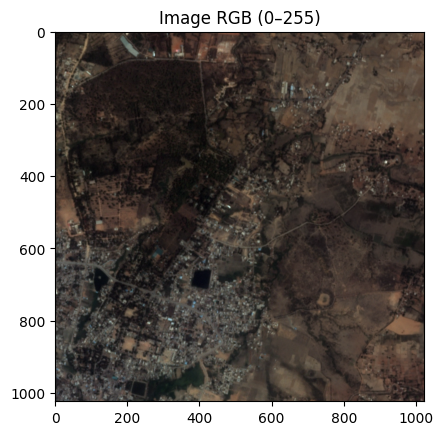

In [44]:
img.show_rgb()

In [45]:
df_merged

,label,key,train_test,labels_path,planet_path
0,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
1,2415_3082_13_18N,2415_3082_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
2,2832_4366_13_21S,2832_4366_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
3,4838_3506_13_36N,4838_3506_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
4,6752_3115_13_50N,6752_3115_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
...,...,...,...,...,...
72,4062_3943_13_30N,4062_3943_13,test,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
73,2569_4513_13_19S,2569_4513_13,test,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
74,2789_4694_13_21S,2789_4694_13,test,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...
75,7517_4908_13-56S,7517_4908_13-56S,test,../../../../tsi/data_education/fil_rouge_Airbu...,NaN


In [46]:
print(PATH_DATA)

../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/


In [47]:
# get localisation of each planet path

shapefile_path = "./ne_110m_admin_0_countries.shp"


In [48]:
import geopandas as gpd
from shapely.geometry import box
from pyproj import Transformer
import rasterio
import pandas as pd
import numpy as np

# Charger la base de données des pays
shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Vérifier que les colonnes existent
print("Colonnes disponibles dans world:", world.columns)

# Vérifier le CRS
if world.crs != "EPSG:4326":
    world = world.to_crs("EPSG:4326")

# Fonction pour récupérer pays et continent
def get_country_continent(image_path):
    try:
        if not isinstance(image_path, str) or pd.isna(image_path):
            return "Inconnu", "Inconnu"

        with rasterio.open(image_path) as src:
            crs = src.crs
            bounds = src.bounds

        if crs and crs.to_epsg() != 4326:
            transformer = Transformer.from_crs(crs, "EPSG:4326", always_xy=True)
            left, bottom = transformer.transform(bounds.left, bounds.bottom)
            right, top = transformer.transform(bounds.right, bounds.top)
        else:
            left, bottom, right, top = bounds.left, bounds.bottom, bounds.right, bounds.top

        # Créer une bounding box
        image_box = box(left, bottom, right, top)

        # Vérifier à quel pays appartient l'image
        for _, country in world.iterrows():
            if country.geometry.intersects(image_box):
                return country["NAME"], country["CONTINENT"]  # Utilisation des bons noms de colonnes

        return "Inconnu", "Inconnu"
    
    except Exception as e:
        print(f"Erreur sur {image_path} : {e}")
        return "Erreur", "Erreur"

# Assurer une copie propre du DataFrame
df_merged = df_merged.dropna(subset=["planet_path"]).copy()

# Appliquer la fonction et ajouter les colonnes
df_merged[["country", "continent"]] = df_merged["planet_path"].apply(
    lambda x: pd.Series(get_country_continent(x + "/2018-05-01.tif"))
)

# Affichage du DataFrame
pd.set_option("display.max_columns", None)
print(df_merged.head())  # Afficher les 5 premières lignes


Colonnes disponibles dans world: Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
              label           key train_test  \
0  4397_4302_13_33S  4397_4302_13      train   
1  2415_3082_13_18N  2415_3082_13      train   
2  2832_4366_13_21S  2832_4366_13      train   
3  4838_3506_13_36N  4838_3506_13      train   
4  6752_3115_13_50N  6752_3115_13      train   

                                         labels_path  \
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
1  ../../../../tsi/data_education/fil_rouge_Airbu...   
2  ../../../../tsi/data_education/fil_rouge_Airbu...   
3  ../../../../tsi/data_education/fil_rouge_Airbu...   
4  ../../../../tsi/data_education/fil_rouge_Airbu...   

                             

In [49]:
df_merged.head(20)

,label,key,train_test,labels_path,planet_path,country,continent
0,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa
1,2415_3082_13_18N,2415_3082_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,United States of America,North America
2,2832_4366_13_21S,2832_4366_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Brazil,South America
3,4838_3506_13_36N,4838_3506_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Egypt,Africa
4,6752_3115_13_50N,6752_3115_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,China,Asia
5,4856_4087_13_36N,4856_4087_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Uganda,Africa
6,5989_3554_13_44N,5989_3554_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,India,Asia
8,2850_4139_13_21S,2850_4139_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Brazil,South America
9,4791_3920_13_36N,4791_3920_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,S. Sudan,Africa
10,4780_3377_13_36N,4780_3377_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Egypt,Africa


In [50]:
df_merged.to_csv("dataframe/df_merged.csv", index=False)

In [51]:
df_zones = df_merged[["planet_path"]].copy()
df_zones.rename(columns={"planet_path": "path"}, inplace=True)

In [52]:
df_zones.head()

,path
0,../../../../tsi/data_education/fil_rouge_Airbu...
1,../../../../tsi/data_education/fil_rouge_Airbu...
2,../../../../tsi/data_education/fil_rouge_Airbu...
3,../../../../tsi/data_education/fil_rouge_Airbu...
4,../../../../tsi/data_education/fil_rouge_Airbu...


In [53]:
image_alignement_check = GeoKeyFrameAlignGPUParallel(dst_crs="EPSG:4326", res=None)


Nombre de GPUs disponibles : 0


In [ ]:
# Initialiser l'alignement avec géoréférenciation et key-frames mensuelles
image_alignement_check = GeoKeyFrameAlign(dst_crs="EPSG:4326", res=None)

# Stocker les résultats
df_all = []

for path in df_zones["path"]:
    print(f"🔍 Analyse de : {path}")
    
    if os.path.exists(path):  # Vérifie si le chemin existe
        try:
            df_folder = image_alignement_check.analyze_folder_keyframe(path, ratio=0.65)
            if not df_folder.empty:
                df_folder["zone_path"] = path  # Ajout du chemin pour référence
                df_all.append(df_folder)
        except Exception as e:
            print(f"❌ Erreur sur {path} : {e}")
    else:
        print(f"⚠️ Chemin non trouvé : {path}")

# Fusionner tous les résultats en un seul DataFrame
if df_all:
    df_final = pd.concat(df_all, ignore_index=True)
    df_final.to_csv("keyframes_alignment.csv", index=False)
    print("✅ Fichier 'keyframes_alignment.csv' généré avec succès !")
else:
    print("⚠️ Aucun résultat à sauvegarder.")

🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR
🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR
🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR
🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR
🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR
🔍 Analyse de : ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/22E-1N/4856_4087_13/PF-SR
❌ Erreur sur ../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/22E-1N/4856_4087_13/PF-SR : not enough values to unpack (expected 2, got 1)
🔍 An

In [ ]:
df_results.to_csv("dataframe/df_results.csv", index=False)
df_mean_shifts.to_csv("dataframe/df_mean_shifts.csv", index=False)
df_max_shifts.to_csv("dataframe/df_max_shifts.csv", index=False)



In [ ]:
df_results.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
count_bool = df_results.apply(lambda col: pd.Series(col.value_counts()))


In [ ]:
count_bool

,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/22E-1N/4856_4087_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.44N/planet/44N/30E-106N/5989_3554_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/31E-407N/2850_4139_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/9E-35N/4791_3920_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/9E-138N/4780_3377_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.48N/planet/48N/17E-138N/6466_3380_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.22S/planet/22S/34E-380N/3002_4273_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.49N/planet/49N/33E-124N/6688_3456_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.31N/planet/31N/21E-30N/4169_3944_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.48N/planet/48N/17E-141N/6468_3360_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50S/planet/50S/34E-412N/6824_4117_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.47N/planet/47N/27E-82N/6381_3681_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.13N/planet/13N/19E-184N/1700_3100_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33N/planet/33N/17E-59N/4421_3800_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.20S/planet/20S/13E-372N/2624_4314_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/13E-100N/4806_3588_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.56S/planet/56S/10E-251N/7513_4968_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.48N/planet/48N/19E-141N/6475_3361_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.11N/planet/11N/30E-146N/1487_3335_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/30E-120N/6810_3478_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.15N/planet/15N/25E-155N/2006_3280_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.19S/planet/19S/11E-241N/2470_5030_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33N/planet/33N/18E-52N/4426_3835_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.60S/planet/60S/13E-245N/8077_5007_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.30N/planet/30N/16E-197N/3998_3016_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/26E-144N/4881_3344_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/15E-129N/6730_3430_13/PF-SR,../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.11N/planet/11N/18E-155N/1417_3281_13/PF-SR,../../../../tsi

In [ ]:
df_results = pd.read_csv("dataframe/df_results.csv")

In [ ]:
df_results.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.34S/planet/34S/10E-393N/4523_4210_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.30N/planet/30N/27E-30N/4062_3943_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.19S/planet/19S/29E-333N/2569_4513_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/19E-299N/2789_4694_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df_merged['labels_path'][0].split("/")[-2]

'33S-13E-9S-L3H-SR'

In [ ]:

df = df_merged

# Générer une liste de dates mensuelles de 2018-01-01 à 2019-12-01 (inclus)
date_range = pd.date_range(start='2018-01-01', end='2019-12-01', freq='MS')  # 'MS' = début de chaque mois

# Pour chaque ligne, on va créer autant de lignes qu’il y a de dates
all_rows = []

for _, row in df.iterrows():
    for dt in date_range:
        # Copier la ligne de base
        new_row = row.copy()
        
        # Transformer la date en format Year_Month_Day (ex: "2018_01_01")
        date_suffix_planet = dt.strftime("%Y-%m-%d")
        suff = row['labels_path'].split("/")[-2]
        date_suffix_labels = dt.strftime("%Y-%m-%d")
        
        # Ajouter la date à la fin de planet_path et labels_path
        new_row['planet_path'] = f"{row['planet_path']}/{date_suffix_planet}.tif"
        new_row['labels_path'] = f"{row['labels_path']}{suff}-{date_suffix_labels}.tif"

        all_rows.append(new_row)

# Créer le nouveau DataFrame étendu
df_extended = pd.DataFrame(all_rows)

# Vérifier le résultat
print(df_extended.head(10))


              label           key train_test  \
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   
0  4397_4302_13_33S  4397_4302_13      train   

                                         labels_path  \
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data_education/fil_rouge_Airbu...   
0  ../../../../tsi/data

In [ ]:
df_results = pd.read_csv("dataframe/df_results.csv")
df_results = df_results.transpose()
paths = df_results.index.tolist()

In [ ]:
df_results.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/22E-1N/4856_4087_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.44N/planet/44N/30E-106N/5989_3554_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/31E-407N/2850_4139_13/PF-SR,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/9E-35N/4791_3920_13/PF-SR,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/9E-138N/4780_3377_13/PF-SR,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,False,True


In [ ]:
df = df_results.copy()

date_range = pd.date_range("2018-02-01", periods=23, freq="MS")


expanded_rows = []
j=0
# 2) Iterate over every row of the original DataFrame
for row in df.itertuples(index=False):

    planet_path = paths[j]
    date_str = pd.to_datetime("2018-01-01").strftime("%Y-%m-%d")
    expanded_rows.append({
        "date": date_str,
        # Append the date to the end of the path, if desired:
        "planet_path": f"{planet_path}/{date_str}.tif",
        "alignment": True
    })
    j+=1 
    print(planet_path)
    # For each month i (0..21) in date_range,
    # use row[i+1] as the alignment boolean (i+1 to skip the path in row[0]).
    for i, dt in enumerate(date_range):
        print(i)
        alignment_bool = row[i]  # columns 1..22
        
        date_str = dt.strftime("%Y-%m-%d")  # e.g. "2018_01_01"
        expanded_rows.append({
            "date": date_str,
            # Append the date to the end of the path, if desired:
            "planet_path": f"{planet_path}/{date_str}.tif",
            "alignment": alignment_bool
        })

../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.33S/planet/33S/12E-375N/4397_4302_13/PF-SR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.18N/planet/18N/24E-187N/2415_3082_13/PF-SR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.21S/planet/21S/27E-362N/2832_4366_13/PF-SR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/19E-115N/4838_3506_13/PF-SR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.50N/planet/50N/19E-182N/6752_3115_13/PF-SR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/planet.36N/planet/36N/22E-1N/

In [ ]:
df_results_extended = pd.DataFrame(expanded_rows)
                                               
df_results_extended.to_csv("dataframe/df_results_extended.csv", index=False)

In [ ]:
df_merged_extended = pd.merge(df_extended, df_results_extended, on="planet_path", how="left")

In [ ]:
df_merged_extended.head()

,label,key,train_test,labels_path,planet_path,country,continent,date,alignment
0,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa,2018-01-01,True
1,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa,2018-02-01,True
2,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa,2018-03-01,True
3,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa,2018-04-01,True
4,4397_4302_13_33S,4397_4302_13,train,../../../../tsi/data_education/fil_rouge_Airbu...,../../../../tsi/data_education/fil_rouge_Airbu...,Angola,Africa,2018-05-01,True


In [ ]:
# save
df_merged_extended.to_csv("dataframe/df_merged_extended.csv", index=False)